In [4]:
import numpy as np
import pandas as pd

# Input data files are available in the "data/" directory.
# For example, running this will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "fashion_data"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz
train-images-idx3-ubyte
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte
train-labels-idx1-ubyte.gz



In [5]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('fashion_data/fashion-mnist_train.csv')
data_test = pd.read_csv('fashion_data/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [6]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
cnn1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [10]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
          validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 20s 417us/step - loss: 0.5583 - accuracy: 0.8054 - val_loss: 0.4016 - val_accuracy: 0.8637
Epoch 2/25
48000/48000 [==============================] - 20s 411us/step - loss: 0.3722 - accuracy: 0.8680 - val_loss: 0.3579 - val_accuracy: 0.8755
Epoch 3/25
48000/48000 [==============================] - 20s 419us/step - loss: 0.3297 - accuracy: 0.8845 - val_loss: 0.3249 - val_accuracy: 0.8853
Epoch 4/25
48000/48000 [==============================] - 20s 424us/step - loss: 0.3018 - accuracy: 0.8929 - val_loss: 0.3028 - val_accuracy: 0.8943
Epoch 5/25
48000/48000 [==============================] - 22s 455us/step - loss: 0.2770 - accuracy: 0.9020 - val_loss: 0.2999 - val_accuracy: 0.8937
Epoch 6/25
48000/48000 [==============================] - 21s 438us/step - loss: 0.2625 - accuracy: 0.9066 - val_loss: 0.2764 - val_accuracy: 0.9030
Epoch 7/

In [11]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.259591809605062
Test accuracy: 0.9193000197410583


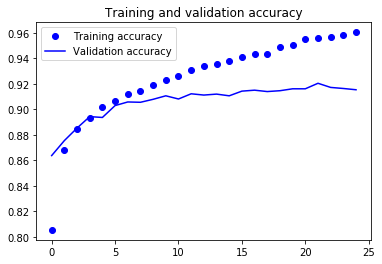

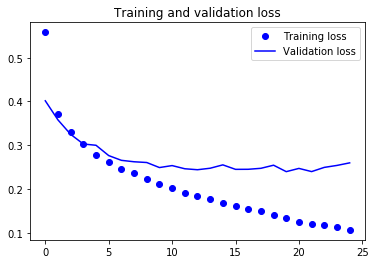

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [13]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

In [15]:
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)


Epoch 1/50
187/187 [==============================] - 46s 247ms/step - loss: 0.2527 - accuracy: 0.9064 - val_loss: 0.2473 - val_accuracy: 0.8994
Epoch 2/50
187/187 [==============================] - 48s 258ms/step - loss: 0.2508 - accuracy: 0.9055 - val_loss: 0.3247 - val_accuracy: 0.8961
Epoch 3/50
187/187 [==============================] - 39s 209ms/step - loss: 0.2527 - accuracy: 0.9057 - val_loss: 0.2456 - val_accuracy: 0.8998
Epoch 4/50
187/187 [==============================] - 39s 207ms/step - loss: 0.2492 - accuracy: 0.9075 - val_loss: 0.2921 - val_accuracy: 0.9002
Epoch 5/50
187/187 [==============================] - 39s 210ms/step - loss: 0.2486 - accuracy: 0.9071 - val_loss: 0.2329 - val_accuracy: 0.8994
Epoch 6/50
187/187 [==============================] - 357s 2s/step - loss: 0.2454 - accuracy: 0.9078 - val_loss: 0.2858 - val_accuracy: 0.8948
Epoch 7/50
187/187 [==============================] - 45s 238ms/step - loss: 0.2473 - accuracy: 0.9089 - val_loss: 0.2328 - val_accu

In [16]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.2358339001059532
Test accuracy: 0.9158999919891357


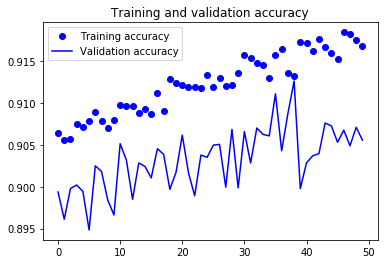

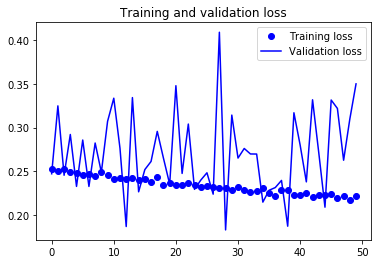

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
